In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys

import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

sys.path.insert(0, os.path.join("..", "src"))
sys.path.insert(0, os.path.join("..", "examples"))

from augmentation import TransformData
from data_generators import (
    generate_test_data_1,
    generate_test_data_2,
    generate_test_data_3,
    generate_test_data_4,
    get_data_from_file,
)

from tools import run_model_for_raw_and_augmented_data, experiment, smape

import warnings

warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiments list

In [3]:
experiments = [
    generate_test_data_1(),
    generate_test_data_2(),
    generate_test_data_3(),
    generate_test_data_4(),
]
for num in [
    "6792",
    "8022",
    "8212",
    "678",
    "679",
    "680",
    "710",
    "801",
    "802",
    "818",
    "819",
    "905",
]:
    filename = f"..\examples\data\df_{num}.csv"
    exp = get_data_from_file(filename)
    experiments.append(exp)

experiments = pd.DataFrame(experiments, columns=["df", "train_test_split"])
experiments

,df,train_test_split
0,time x y ...,2021-01-20
1,time x y ...,2021-01-20
2,time x y ...,2021-01-20
3,time x1 x2 ...,2021-01-20
4,time current_a current_b...,2021-09-20
5,time current_a current_b...,2021-08-15
6,time current_a current_b...,2021-09-01
7,time current_a current_b...,2022-01-01
8,time current_a current_b...,2021-11-01
9,time current_a current_b...,2021-08-01


## Do all experiments

In [20]:
model = RandomForestRegressor(n_estimators=200)

pivot_result_table = []
all_result_together = []
for i, row in experiments.iterrows():

    df, train_test_split, num = row.df, row.train_test_split, i
    print(f"experiment {num} is processing...")
    experiment_name = f"experiment_{num}"
    experiment_result = run_model_for_raw_and_augmented_data(model, df, train_test_split)
    e = experiment_result
    e = e[e.y > 10]
    e = experiment_result[~np.isnan(experiment_result.y)]
    result_raw_data = smape(e.y, e.pred_raw)
    result_augmented_data = smape(e.y, e.pred_augm)
    result_tabgan_data = smape(e.y, e.pred_gan)

    experiment_result["experiment_name"] = num
    all_result_together.append(experiment_result)

    pivot_result_table.append(
        [num, result_raw_data, result_augmented_data, result_tabgan_data]
    )

pivot_result_table = pd.DataFrame(
    data=pivot_result_table,
    columns=[
        "experiment name",
        "raw data smape",
        "augmented data smape",
        "tabgan data smape",
    ],
)

all_result_together = pd.concat(all_result_together)
pivot_result_table

experiment 0 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/2 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 1 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/2 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 2 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/2 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 3 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/5 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Tabgan error: After post-processing generated data's shape less than 10. For columns x4 test might be highly skewed. Filter conditions are min_val = 454.97939645029095 and max_val = 720.2321668947437.. Tabgun prediction = -1

experiment 4 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 5 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 6 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/12 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

Tabgan error: After post-processing generated data's shape less than 10. For columns pres_intake test might be highly skewed. Filter conditions are min_val = 7.885713257142857 and max_val = 8.438300000000025.. Tabgun prediction = -1

experiment 7 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 8 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 9 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 10 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 11 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 12 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 13 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 14 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

experiment 15 is processing...


Fitting CTGAN transformers for each column:   0%|          | 0/13 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

,experiment name,raw data smape,augmented data smape,tabgan data smape
0,0,0.115945,0.023470,0.141345
1,1,0.070071,0.165339,0.481638
2,2,0.150302,0.047687,0.237429
3,3,0.058248,0.097395,1.010569
4,4,0.053796,0.068383,0.053426
5,5,0.046763,0.036720,0.046734
6,6,0.059316,0.061244,1.015320
7,7,0.027809,0.047167,0.027287
8,8,0.012798,0.023145,0.013156
9,9,0.051514,0.080247,0.062099


### Среднее SMAPE

In [23]:
pivot_result_table[
    ["raw data smape", "augmented data smape", "tabgan data smape"]
].mean()

raw data smape          0.062459
augmented data smape    0.061413
tabgan data smape       0.223552
dtype: float64

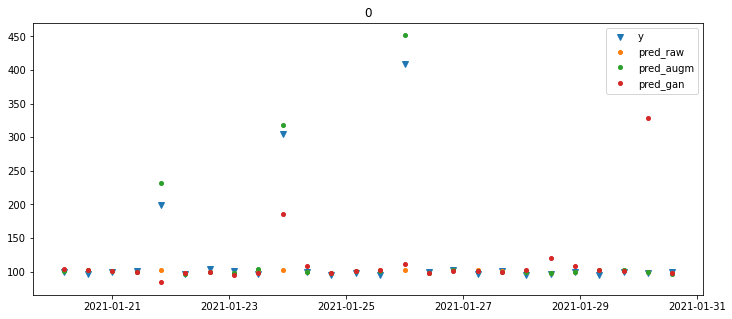

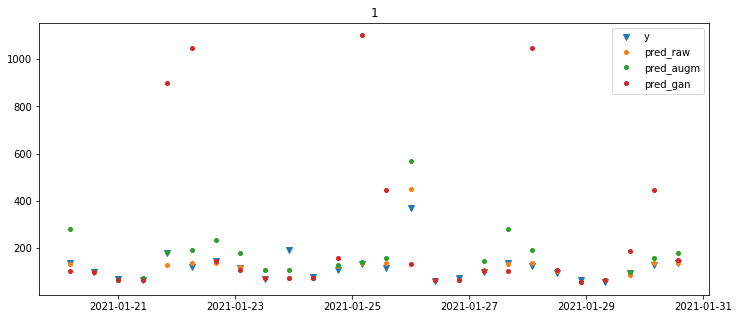

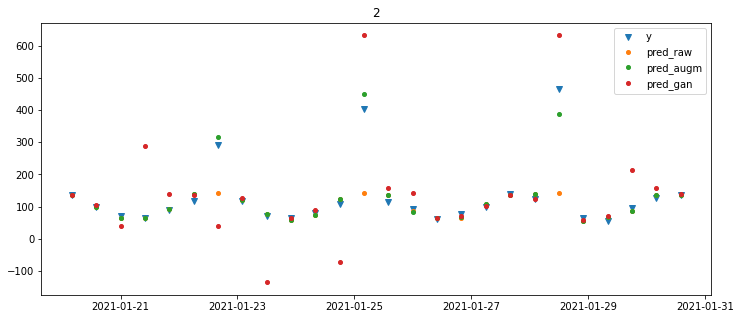

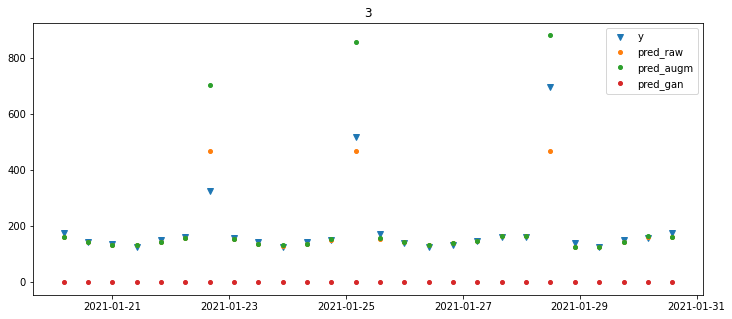

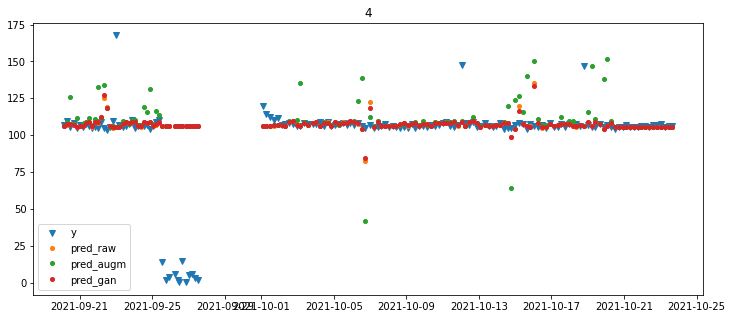

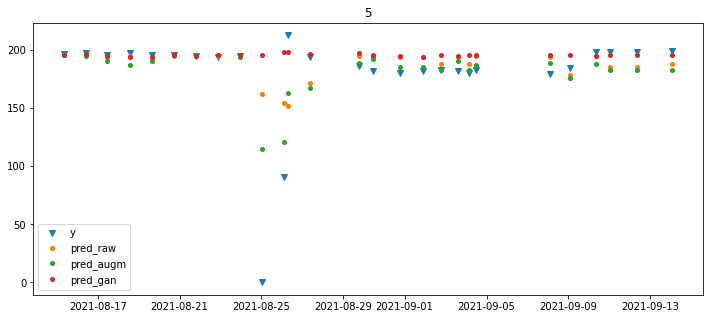

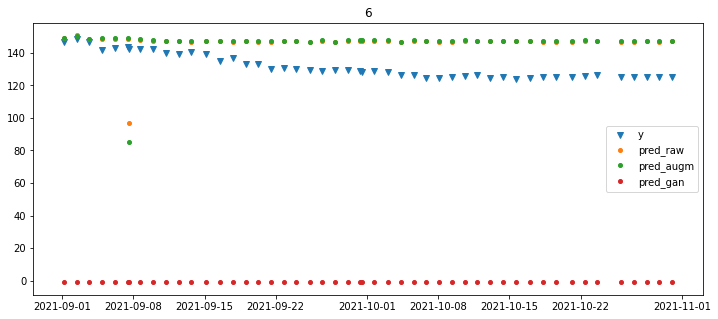

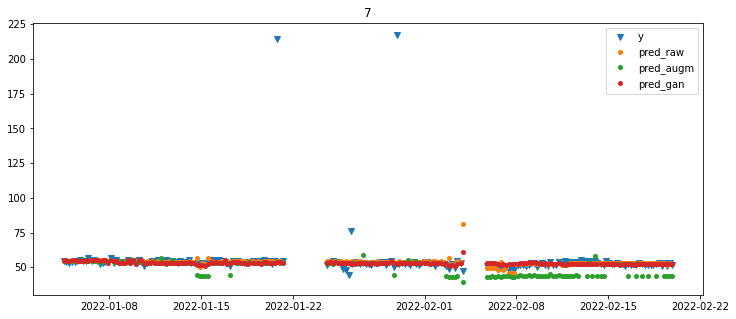

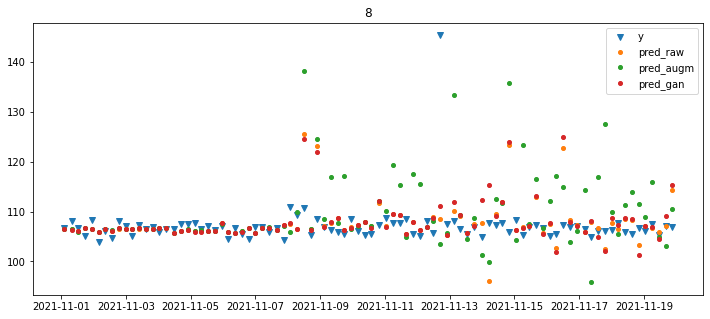

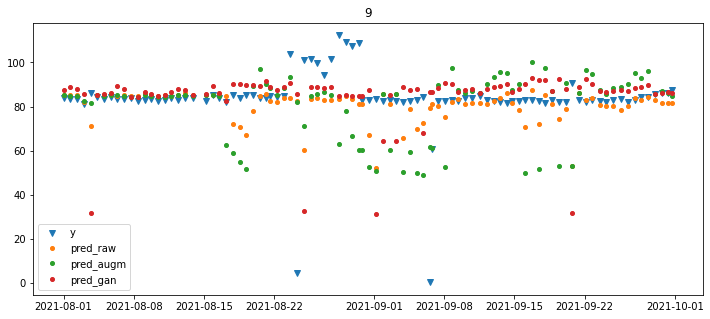

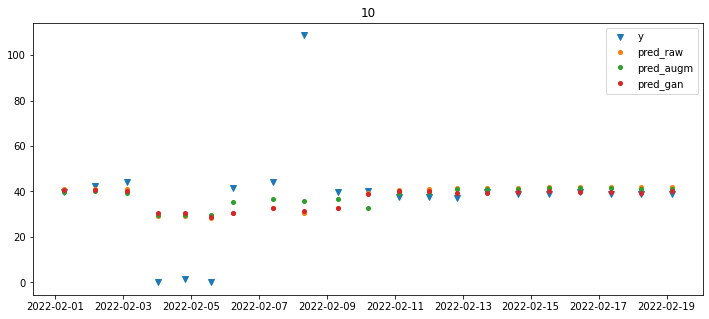

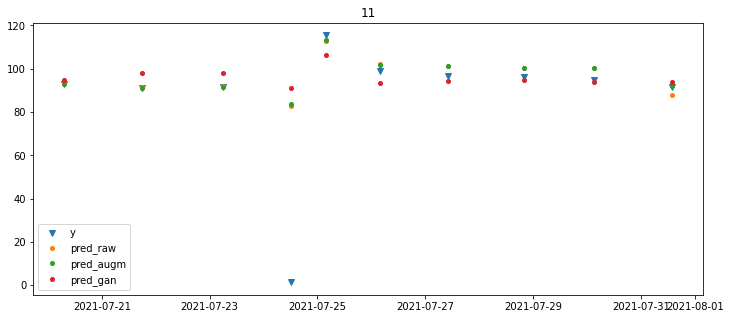

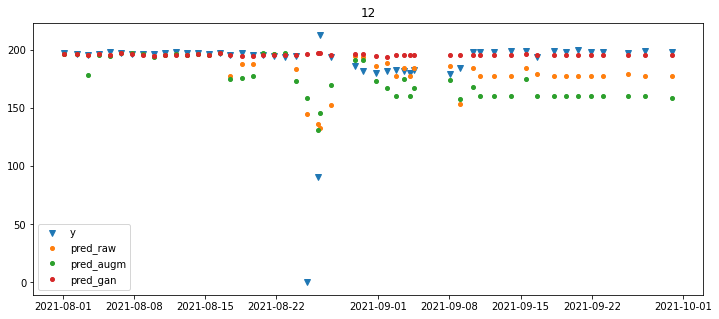

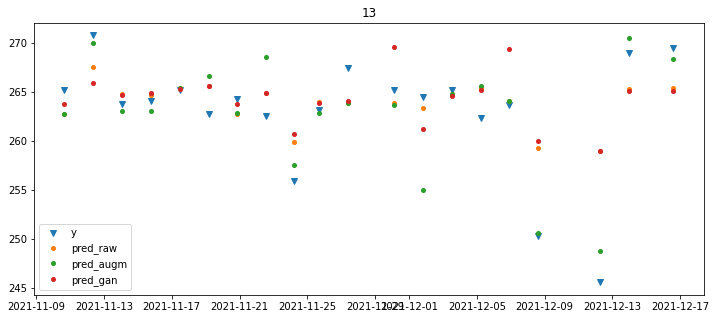

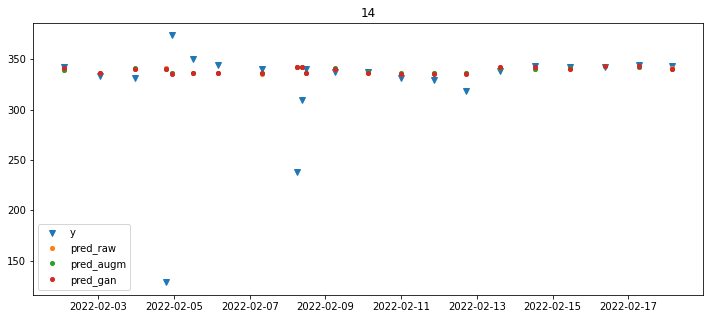

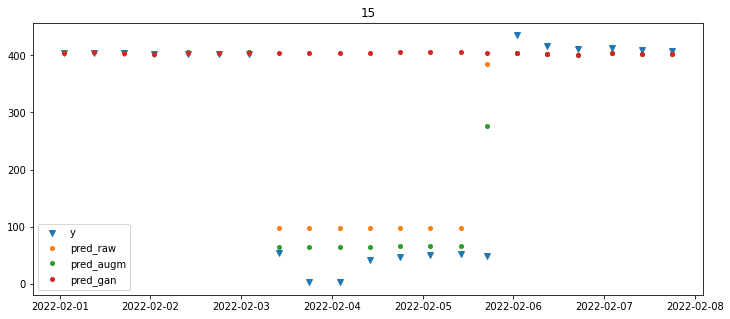

In [25]:
for experiment_name in all_result_together.experiment_name.unique():
    d = all_result_together[all_result_together.experiment_name == experiment_name]
    d = d[~np.isnan(d.y)]
    plt.figure(figsize=(12, 5))
    plt.plot(d.time, d.y, "v", markersize=6, label="y")
    plt.plot(d.time, d.pred_raw, "o", markersize=4, label="pred_raw")
    plt.plot(d.time, d.pred_augm, "o", markersize=4, label="pred_augm")
    plt.plot(d.time, d.pred_gan, "o", markersize=4, label="pred_gan")
    plt.legend()
    plt.title(experiment_name)
    plt.show()